In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [3]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_circularity4.csv')
data.head()

,Year,scenario.percent.repurposed,scenario.reuse.lifespan,material,kWh.retired,kg.retired,kg.recycled.weight,kWh,kg.demand,circularity (%),collection_rate,recycling.process_direct,recycling.process_hydro,recycling.process_pyro,Sales.Scenario_SDS,Sales.Scenario_STEPS,Cathode.Scenario_LFP,Cathode.Scenario_NCX
0,2020,0,0,0,2417264.362,7192595.151,6473335.636,20735767.32,68338836.46,0.094724,0.6,1,0,0,1,0,1,0
1,2020,0,0,0,2417264.362,7192595.151,6473335.636,20735767.32,68338836.46,0.094724,0.6,1,0,0,0,1,1,0
2,2020,0,0,0,2417264.362,7192595.151,6473335.636,20735767.32,68338836.46,0.094724,0.6,0,1,0,1,0,1,0
3,2020,0,0,0,2417264.362,7192595.151,6473335.636,20735767.32,68338836.46,0.094724,0.6,0,1,0,0,1,1,0
4,2020,0,0,0,2417264.362,7192595.151,0.000,20735767.32,68338836.46,0.000000,0.6,0,0,1,1,0,1,0


In [4]:
X = data.drop('circularity (%)', axis=1)
y = data['circularity (%)']


print(X,y)

        Year  scenario.percent.repurposed  scenario.reuse.lifespan  material  \
0       2020                            0                        0         0   
1       2020                            0                        0         0   
2       2020                            0                        0         0   
3       2020                            0                        0         0   
4       2020                            0                        0         0   
...      ...                          ...                      ...       ...   
146798  2050                            2                        2         5   
146799  2050                            2                        2         5   
146800  2050                            2                        2         6   
146801  2050                            2                        2         6   
146802  2050                            2                        2         6   

         kWh.retired    kg.retired  kg.

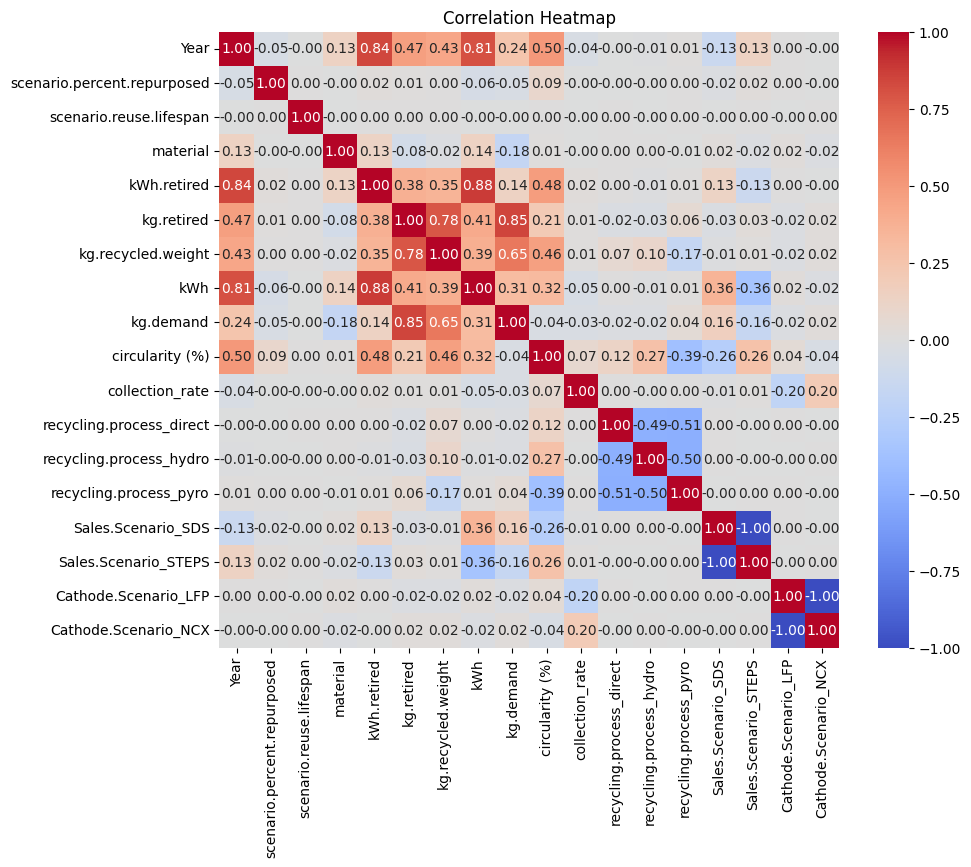

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)

# Fix RMSLE calculation
forest_pred = np.maximum(forest_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(forest_pred) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - forest_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 19.23%


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, linear_pred)
mse = mean_squared_error(y_test, linear_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linear_pred)

# Fix RMSLE calculation
linear_pred = np.maximum(linear_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(linear_pred) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - linear_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R-squared (R2): 0.65
Root Mean Squared Logarithmic Error (RMSLE): 0.05
Mean Absolute Percentage Error (MAPE): 1112844964.66%


In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate Bayesian Ridge Regression model
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_pred = bayesian_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, bayesian_pred)
mse = mean_squared_error(y_test, bayesian_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, bayesian_pred)

# Fix RMSLE calculation
bayesian_pred = np.maximum(bayesian_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(bayesian_pred) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - bayesian_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R-squared (R2): 0.65
Root Mean Squared Logarithmic Error (RMSLE): 0.05
Mean Absolute Percentage Error (MAPE): 1112987465.24%


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate Support Vector Regression model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # RBF kernel is commonly used
svr_model.fit(X_train, y_train.ravel())  # Ensure y_train is a 1D array
svr_pred = svr_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)

# Fix RMSLE calculation
svr_pred = np.maximum(svr_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(svr_pred) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - svr_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


<ipython-input-9-c1719cfb2048>:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svr_model.fit(X_train, y_train.ravel())  # Ensure y_train is a 1D array


Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared (R2): 0.72
Root Mean Squared Logarithmic Error (RMSLE): 0.04
Mean Absolute Percentage Error (MAPE): 855670169.03%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')  # Default k=5
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)

# Fix RMSLE calculation
knn_pred = np.maximum(knn_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(knn_pred) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - knn_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R2): 0.97
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 183188461.92%


In [20]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the Lasso model with cross-validation
lasso_model = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)

# Fix RMSLE calculation
lasso_pred_safe = np.maximum(lasso_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(lasso_pred_safe) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - lasso_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Print the best alpha value chosen by cross-validation
print(f"Best alpha value: {lasso_model.alpha_}")


Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R-squared (R2): 0.65
Root Mean Squared Logarithmic Error (RMSLE): 0.05
Mean Absolute Percentage Error (MAPE): 1278985373.21%
Best alpha value: 4.917531996798432e-05


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the Ridge model with a specific alpha value (you can adjust alpha)
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, ridge_pred)
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ridge_pred)

# Fix RMSLE calculation
ridge_pred_safe = np.maximum(ridge_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(ridge_pred_safe) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - ridge_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R-squared (R2): 0.65
Root Mean Squared Logarithmic Error (RMSLE): 0.05
Mean Absolute Percentage Error (MAPE): 1279407602.34%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.09538e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [6]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=b3b15cf24686fcdbac54ada955f329a1edabd8031a34e597eece18c49ebcad36
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [ ]:
from pyswarm import pso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the evaluation function for PSO
def objective_function(params):
    n_estimators = int(params[0])  # Number of trees in the forest
    max_depth = int(params[1])     # Maximum depth of each tree

    # Create and evaluate the Random Forest model with the current 'n_estimators' and 'max_depth'
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Calculate Metrics
    mae = mean_absolute_error(y_test, rf_pred)
    mse = mean_squared_error(y_test, rf_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, rf_pred)

    # RMSLE calculation
    rf_pred_safe = np.maximum(rf_pred, 1e-9)  # Ensure no negative values
    y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
    rmsle = np.sqrt(np.mean((np.log1p(rf_pred_safe) - np.log1p(y_test_fixed)) ** 2))

    # MAPE calculation
    y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
    mape = np.mean(np.abs((y_test - rf_pred) / y_test_safe)) * 100

    # Return the Mean Squared Error (MSE) for minimization
    return mse

# Define the bounds for 'n_estimators' and 'max_depth' in RandomForestRegressor
lb = [10, 2]  # Lower bounds for n_estimators and max_depth
ub = [100, 10]  # Upper bounds for n_estimators and max_depth (simplified range)

# Run PSO to optimize 'n_estimators' and 'max_depth'
best_params, best_value = pso(objective_function, lb, ub, swarmsize=5, maxiter=10, debug=True)

# Print the best found parameters and their corresponding objective function value
print(f"Best n_estimators found: {int(best_params[0])}")
print(f"Best max_depth found: {int(best_params[1])}")
print(f"Best MSE (objective function value): {best_value}")

# Create and evaluate the Random Forest model with the optimized parameters
rf_model = RandomForestRegressor(n_estimators=int(best_params[0]), max_depth=int(best_params[1]), random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Fix RMSLE calculation
rf_pred_safe = np.maximum(rf_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(rf_pred_safe) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - rf_pred) / y_test_safe)) * 100

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


No constraints given.
New best for swarm at iteration 1: [100.  10.] 0.00013883357758651162
Best after iteration 1: [100.  10.] 0.00013883357758651162
New best for swarm at iteration 2: [44.15015332 10.        ] 0.00013849978773202394
Best after iteration 2: [44.15015332 10.        ] 0.00013849978773202394
Best after iteration 3: [44.15015332 10.        ] 0.00013849978773202394
Best after iteration 4: [44.15015332 10.        ] 0.00013849978773202394
New best for swarm at iteration 5: [68.15979369 10.        ] 0.00013820695229651555
Best after iteration 5: [68.15979369 10.        ] 0.00013820695229651555
Best after iteration 6: [68.15979369 10.        ] 0.00013820695229651555
New best for swarm at iteration 7: [67.85381601 10.        ] 0.0001379526535264723
Best after iteration 7: [67.85381601 10.        ] 0.0001379526535264723
New best for swarm at iteration 8: [64.74139122 10.        ] 0.00013746396902201022
Best after iteration 8: [64.74139122 10.        ] 0.00013746396902201022
New 

In [21]:
from pyswarm import pso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the evaluation function for PSO
def objective_function(params):
    n_estimators = int(params[0])  # Number of trees in the forest
    max_depth = int(params[1])     # Maximum depth of each tree

    # Create and evaluate the Random Forest model with the current 'n_estimators' and 'max_depth'
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Calculate Metrics
    mae = mean_absolute_error(y_test, rf_pred)
    mse = mean_squared_error(y_test, rf_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, rf_pred)

    # RMSLE calculation
    rf_pred_safe = np.maximum(rf_pred, 1e-9)  # Ensure no negative values
    y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
    rmsle = np.sqrt(np.mean((np.log1p(rf_pred_safe) - np.log1p(y_test_fixed)) ** 2))

    # MAPE calculation
    y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
    mape = np.mean(np.abs((y_test - rf_pred) / y_test_safe)) * 100

    # Return the Mean Squared Error (MSE) for minimization
    return mse

# Define the bounds for 'n_estimators' and 'max_depth' in RandomForestRegressor
lb = [10, 2]  # Lower bounds for n_estimators and max_depth
ub = [100, 10]  # Upper bounds for n_estimators and max_depth (simplified range)

# Run PSO to optimize 'n_estimators' and 'max_depth'
best_params, best_value = pso(objective_function, lb, ub, swarmsize=5, maxiter=10, debug=True)

# Print the best found parameters and their corresponding objective function value
print(f"Best n_estimators found: {int(best_params[0])}")
print(f"Best max_depth found: {int(best_params[1])}")
print(f"Best MSE (objective function value): {best_value}")

# Create and evaluate the Random Forest model with the optimized parameters
rf_model = RandomForestRegressor(n_estimators=int(best_params[0]), max_depth=int(best_params[1]), random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Fix RMSLE calculation
rf_pred_safe = np.maximum(rf_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(rf_pred_safe) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - rf_pred) / y_test_safe)) * 100

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


No constraints given.
New best for swarm at iteration 1: [100.  10.] 0.00013883357758651162
Best after iteration 1: [100.  10.] 0.00013883357758651162
Best after iteration 2: [100.  10.] 0.00013883357758651162
Best after iteration 3: [100.  10.] 0.00013883357758651162
Best after iteration 4: [100.  10.] 0.00013883357758651162
Best after iteration 5: [100.  10.] 0.00013883357758651162
New best for swarm at iteration 6: [92.9792541 10.       ] 0.00013864382986381518
Best after iteration 6: [92.9792541 10.       ] 0.00013864382986381518
Best after iteration 7: [92.9792541 10.       ] 0.00013864382986381518
New best for swarm at iteration 8: [96.82830997 10.        ] 0.00013855412107214077
Best after iteration 8: [96.82830997 10.        ] 0.00013855412107214077
Best after iteration 9: [96.82830997 10.        ] 0.00013855412107214077
Best after iteration 10: [96.82830997 10.        ] 0.00013855412107214077
Stopping search: maximum iterations reached --> 10
Best n_estimators found: 96
Best m

In [ ]:
!pip install --upgrade scikit-learn scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Simulating a high-fidelity function (could be any complex function)
def high_fidelity_func(X):
    return np.sin(X) + np.cos(X)  # Example of a complex function

# Simulating lower-fidelity data (can be a cheaper approximation of the high-fidelity model)
def low_fidelity_func(X):
    return np.sin(X)  # Simpler function to approximate

# Generate data (example)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Feature space
y_high_fidelity = high_fidelity_func(X).ravel()  # Target for high-fidelity model
y_low_fidelity = low_fidelity_func(X).ravel()  # Target for low-fidelity model


# Scaling features (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Predict using the trained model on the validation set
y_pred_val = rf_model.predict(X_val)

# Evaluate the model on the validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)

# RMSLE calculation for validation set
y_pred_safe_val = np.maximum(y_pred_val, 1e-9)  # Avoid zero issues in RMSLE
y_val_safe_val = np.maximum(y_val, 1e-9)  # Avoid zero issues in RMSLE
rmsle_val = np.sqrt(np.mean((np.log1p(y_pred_safe_val) - np.log1p(y_val_safe_val)) ** 2))

# MAPE calculation for validation set
mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val_safe_val)) * 100

# Print results on validation set
print(f"Random Forest Regression on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared (R2): {r2_val:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_val:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.2f}%")

# Predict using the trained model on the test set
y_pred_test = rf_model.predict(X_test)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# RMSLE calculation for test set
y_pred_safe_test = np.maximum(y_pred_test, 1e-9)  # Avoid zero issues in RMSLE
y_test_safe_test = np.maximum(y_test, 1e-9)  # Avoid zero issues in RMSLE
rmsle_test = np.sqrt(np.mean((np.log1p(y_pred_safe_test) - np.log1p(y_test_safe_test)) ** 2))

# MAPE calculation for test set
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test_safe_test)) * 100

# Print results on test set
print(f"Random Forest Regression on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R2): {r2_test:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_test:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")


Random Forest Regression on Validation Set:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.39%
Random Forest Regression on Test Set:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.40%


Cross-Validation RMSE Scores: [0.01158956 0.01164032 0.01159115 0.01111191 0.01132201]
Mean Cross-Validation RMSE: 0.0114509882507292


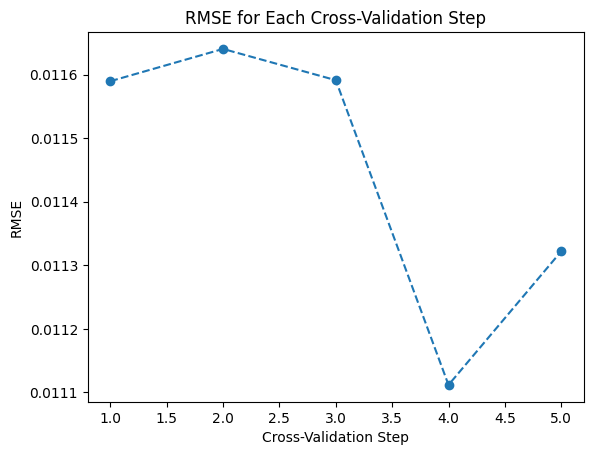

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define Random Forest model with simple hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Perform cross-validation (using 5 folds) and calculate the negative mean squared error
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convert negative MSE to RMSE
cv_rmse_scores = (-cv_scores) ** 0.5

# Print results
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each cross-validation step
plt.plot(range(1, len(cv_rmse_scores) + 1), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Cross-Validation Step')
plt.show()


Test Mean Squared Error: 0.00013705148930335962
Test Mean Absolute Error: 0.007322307705372924
Validation Mean Squared Error: 0.00013777731718397354
Validation Mean Absolute Error: 0.007389173481086539


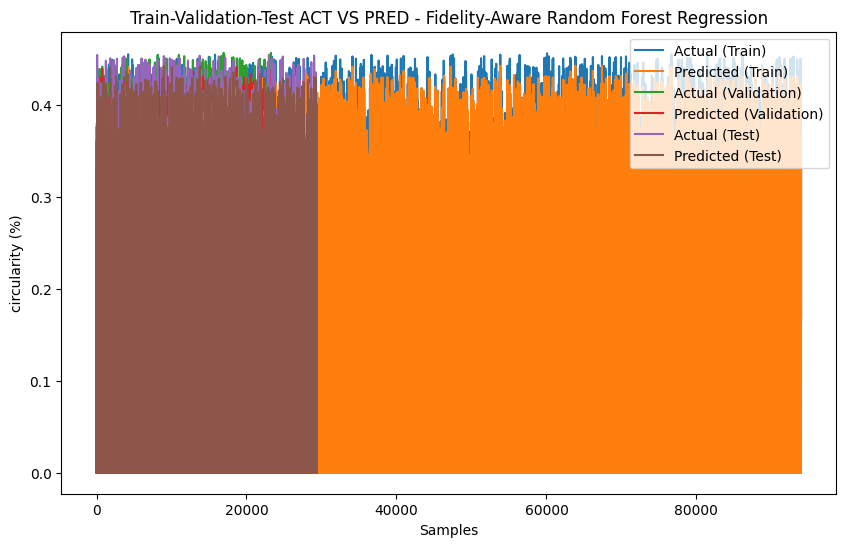

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define Fidelity Levels (Example: Assign higher weights to high-fidelity data)
def assign_fidelity_weights(X_train):
    # Assuming higher fidelity for certain samples (you can change this logic)
    weights = np.ones(len(X_train))
    weights[: len(X_train) // 3] *= 0.5  # Low-fidelity samples (Lower weight)
    weights[len(X_train) // 3 : 2 * len(X_train) // 3] *= 1.0  # Medium-fidelity samples
    weights[2 * len(X_train) // 3 :] *= 2.0  # High-fidelity samples (Higher weight)
    return weights

# Assign fidelity weights to the training data
fidelity_weights = assign_fidelity_weights(X_train)

# Define Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the Random Forest model with fidelity weights
rf_model.fit(X_train, y_train, sample_weight=fidelity_weights)

# Predict on the test set
y_pred_test = rf_model.predict(X_test)

# Calculate evaluation metrics (Test Set)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print evaluation metrics
print("Test Mean Squared Error:", mse_test)
print("Test Mean Absolute Error:", mae_test)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate evaluation metrics (Validation Set)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print validation metrics
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)

# Predict on the training set
y_pred_train = rf_model.predict(X_train)

# Plot Train-Validation-Test Predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('circularity (%)')  # Change based on your actual target variable
plt.title('Train-Validation-Test ACT VS PRED - Fidelity-Aware Random Forest Regression')
plt.legend()
plt.show()
